<a href="https://colab.research.google.com/github/TrungDong888/BTVN_AI/blob/main/PhamTrungDong_18146101_NhanDienTraiCay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
import os

In [4]:
train_data = '/content/drive/MyDrive/10TraiCay/Train'
val_data  =  '/content/drive/MyDrive/10TraiCay/Validation'
test_data =  '/content/drive/MyDrive/10TraiCay/Test'

In [5]:
from keras.engine.data_adapter import train_validation_split
#preprocessing
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(100, 100),
                        batch_size=10,
                        class_mode="categorical")

val_input = data_scale.flow_from_directory(val_data,
                        target_size=(100, 100),
                        batch_size=10,
                        class_mode="categorical")

test_input = data_scale.flow_from_directory(test_data,
                        target_size=(100, 100),
                        batch_size=10,
                        class_mode="categorical")

Found 254 images belonging to 10 classes.
Found 88 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
class_fruit = ['Cam', 'Cà Rốt', 'Cà Tím', 'Chuối', 'Dưa Hấu', 'Dừa', 'Mẳng Cầu', 'Mận', 'Nhãn','Thanh Long']

print("labels: ", class_fruit)
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

labels:  ['Cam', 'Cà Rốt', 'Cà Tím', 'Chuối', 'Dưa Hấu', 'Dừa', 'Mẳng Cầu', 'Mận', 'Nhãn', 'Thanh Long']
match class:  {'Cam': 0, 'Cà Rốt': 1, 'Cà Tím': 2, 'Chuối': 3, 'Dưa Hấu': 4, 'Dừa': 5, 'Mẳng Cầu': 6, 'Mận': 7, 'Nhãn': 8, 'Thanh Long': 9}
Tổng cộng:  10


In [7]:
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 64)        0

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
money_train = model.fit(train_input,batch_size=10,epochs=50,verbose=1,validation_data=val_input)

Epoch 1/50
26/26 [==============================] - 86s 3s/step - loss: 5.3983 - accuracy: 0.0984 - val_loss: 2.2564 - val_accuracy: 0.2273
Epoch 2/50
26/26 [==============================] - 9s 359ms/step - loss: 2.0416 - accuracy: 0.2598 - val_loss: 2.0669 - val_accuracy: 0.2955
Epoch 3/50
26/26 [==============================] - 10s 365ms/step - loss: 1.8461 - accuracy: 0.3031 - val_loss: 1.8320 - val_accuracy: 0.3409
Epoch 4/50
26/26 [==============================] - 9s 360ms/step - loss: 1.6917 - accuracy: 0.3189 - val_loss: 1.8014 - val_accuracy: 0.3295
Epoch 5/50
26/26 [==============================] - 9s 357ms/step - loss: 1.5589 - accuracy: 0.4094 - val_loss: 1.6410 - val_accuracy: 0.3409
Epoch 6/50
26/26 [==============================] - 9s 355ms/step - loss: 1.3833 - accuracy: 0.5000 - val_loss: 1.4670 - val_accuracy: 0.4318
Epoch 7/50
26/26 [==============================] - 9s 362ms/step - loss: 1.1412 - accuracy: 0.5827 - val_loss: 1.1195 - val_accuracy: 0.6591
Epoch 8

In [13]:
model.save('/content/drive/MyDrive/AI/CNN_10TraiCay/fruit.h5')

Loại Trái Cây: Dừa


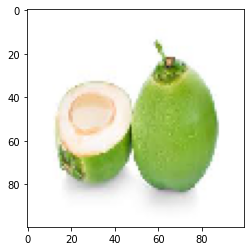

In [15]:
pic = image.load_img('/content/drive/MyDrive/10TraiCay/Train/Dừa/dua11.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loại Trái Cây: Cam")
if guess[0]==1:
  print("Loại Trái Cây: Cà Rốt")
if guess[0]==2:
  print("Loại Trái Cây: Cà Tím")
if guess[0]==3:
  print("Loại Trái Cây: Chuối")
if guess[0]==4:
  print("Loại Trái Cây: Dưa Hấu")
if guess[0]==5:
  print("Loại Trái Cây: Mẳng cầu")
if guess[0]==6:
  print("Loại Trái Cây: Dừa")
if guess[0]==7:
  print("Loại Trái Cây: Mận")
if guess[0]==8:
  print("Loại Trái Cây: Nhãn")
if guess[0]==9:
  print("Loại Trái Cây: Thanh Long")

Loại Trái Cây: Thanh Long


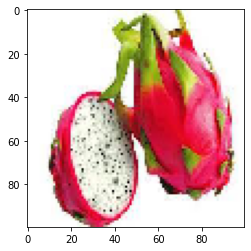

In [16]:
pic = image.load_img('/content/drive/MyDrive/10TraiCay/Train/Thanh Long/tải xuống (6).jpeg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loại Trái Cây: Cam")
if guess[0]==1:
  print("Loại Trái Cây: Cà Rốt")
if guess[0]==2:
  print("Loại Trái Cây: Cà Tím")
if guess[0]==3:
  print("Loại Trái Cây: Chuối")
if guess[0]==4:
  print("Loại Trái Cây: Dưa Hấu")
if guess[0]==5:
  print("Loại Trái Cây: Dừa")
if guess[0]==6:
  print("Loại Trái Cây: Mẳng cầu")
if guess[0]==7:
  print("Loại Trái Cây: Mận")
if guess[0]==8:
  print("Loại Trái Cây: Nhãn")
if guess[0]==9:
  print("Loại Trái Cây: Thanh Long")